In [ ]:
import math
import scipy
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer

import re
import nltk
from nltk.corpus import stopwords

In [ ]:
# verified
df = pd.read_csv("VerifiedDataset.csv",on_bad_lines='skip')

# unverified
df2 = pd.read_csv("stackoverflow_full.csv",on_bad_lines='skip')
df.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,Unnamed: 15
0,19341,<35,No,Undergraduate,1,Man,No,Dev,4,0,Brazil,4944,Assembly;Bash/Shell;C;C#;C++;Dart;Elixir;Go;Ha...,40,1,NaN
1,295,<35,No,Undergraduate,1,Man,Yes,Dev,4,0,India,8376,C++;HTML/CSS;JavaScript;Node.js;Git;Angular;Re...,12,0,NaN
2,375,<35,No,Undergraduate,0,Man,Yes,Dev,11,0,Australia,16050,C#;JavaScript;Git;Flask;jQuery,5,0,NaN
3,37095,<35,No,Other,1,Man,No,Dev,6,0,United States of America,100000,Assembly;Bash/Shell;C;C#;Clojure;Haskell;HTML/...,37,1,NaN
4,621,<35,No,Undergraduate,1,Woman,Yes,Dev,10,0,Greece,12324,C;C++;HTML/CSS;Java;JavaScript;Kotlin;Matlab;P...,18,1,NaN


In [ ]:
print(df.columns)
# df = df[["Age", "EdLevel", "Employment", "YearsCode", "YearsCodePro", "ComputerSkills", "Employed"]]
# df2 = df2[["Age", "EdLevel", "Employment", "YearsCode", "YearsCodePro", "ComputerSkills", "Employed"]]

nan_count = df['HaveWorkedWith'].isna().sum()
print(nan_count)

df = df.dropna(subset=['HaveWorkedWith'])


Index(['Unnamed: 0', 'Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender',
       'MentalHealth', 'MainBranch', 'YearsCode', 'YearsCodePro', 'Country',
       'PreviousSalary', 'HaveWorkedWith', 'ComputerSkills', 'Employed',
       'Unnamed: 15'],
      dtype='object')
63


In [ ]:
# verified
df = pd.read_csv("VerifiedDataset.csv",on_bad_lines='skip')

# unverified
# df2 = pd.read_csv("stackoverflow_full.csv",on_bad_lines='skip')
# df.head()

# jobs
linkedin_jobs = pd.read_csv("LinkedIn Jobs-Table 1.csv",on_bad_lines='skip')
geton_jobs = pd.read_csv("GetonBoard Jobs-Table 1.csv",on_bad_lines='skip')

# Parsing Part

In [ ]:
# before
linkedin_jobs.head()

,company_name,title,description,formatted_work_type,job_posting_url,application_url,formatted_experience_level,skills_desc
0,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,Full-time,https://www.linkedin.com/jobs/view/921716/?trk...,NaN,NaN,Requirements: \n\nWe are seeking a College or ...
1,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",Full-time,https://www.linkedin.com/jobs/view/1829192/?tr...,NaN,NaN,NaN
2,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,Full-time,https://www.linkedin.com/jobs/view/10998357/?t...,NaN,NaN,We are currently accepting resumes for FOH - A...
3,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,Full-time,https://www.linkedin.com/jobs/view/23221523/?t...,NaN,NaN,This position requires a baseline understandin...
4,NaN,Service Technician,Looking for HVAC service tech with experience ...,Full-time,https://www.linkedin.com/jobs/view/35982263/?t...,NaN,NaN,NaN


In [ ]:
# before
geton_jobs.head()

,Source,Title,Company,Description,Link
0,Get on Board,Cloud Engineer,CMPC,MISIÓN\nLa infraestructura Cloud para CMPC cor...,https://www.getonbrd.com/jobs/sysadmin-devops-...
1,Get on Board,Desarrollador Cloud,Dirección ChileCompra,Somos la institución encargada de administrar ...,https://www.getonbrd.com/jobs/sysadmin-devops-...
2,Get on Board,Testing Automation Leader,Sophos Solutions,Acerca del empleo\nSophos.GFT es una compañía ...,https://www.getonbrd.com/jobs/sysadmin-devops-...
3,Get on Board,Bilingual .NET Developer,Sophos Solutions,Somos una compañía global de soluciones tecnol...,https://www.getonbrd.com/jobs/programming/bili...
4,Get on Board,React o React Native Developer,Digitalproserver,En Digitalproserver desarrollamos soluciones e...,https://www.getonbrd.com/jobs/mobile-developer...


In [ ]:
# stopwords english version
nltk.download('stopwords')
stop_words_en = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def parse_text_linkedin(text):
  text = re.sub(r'([a-z])([A-Z])', r'\1 \2', text) # any joint words
  text = text.lower() # lowercase
  text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # non-ASCII characters
  text = re.sub(r'\d+', '', text)  # rid of all #
  #text = re.findall(r'\b[a-zA-Z0-9\'-]+\b', text)
  words = re.findall(r'\b[a-zA-Z\'-]+\b', text)  #  keep alphabetic characters and hyphenated words
  words = [word for word in words if word not in stop_words_en] # remove stopwords english ver
  text = ' '.join(words)
  text = re.sub(r'\s+', ' ', text).strip()
  return text

# example to see if it works
text_main = "€™s orders. â€¢ 34 Read physiciansâ€™ orders, measure arterial blood gases, and review patient information to assess patientâ€™s condition. â€¢ Explain treatment procedures to patients to gain cooperation and allay fears. â€¢ Monitor patientâ€™s physiological responses to therapy such as vital signs, arterial blood gases and blood chemistry changes and consult with physician if adverse reactions occur. â€¢ Administer therapeutic gases including nitrogen, nitric oxide, heliox, etc. â€¢ Enforce safety rules and ensure careful adherence to physiciansâ€™ orders. â€¢ Maintain charts that contain patient pertinent identification and therapy information. â€¢ Inspect, clean, test, and maintain respiratory therapy equipment to ensure equipment is functioning safely and efficiently and notify manager/supervisor when repairs are necessary. â€¢"

parse_text_linkedin(text_main)

'orders read physicians orders measure arterial blood gases review patient information assess patient condition explain treatment procedures patients gain cooperation allay fears monitor patient physiological responses therapy vital signs arterial blood gases blood chemistry changes consult physician adverse reactions occur administer therapeutic gases including nitrogen nitric oxide heliox etc enforce safety rules ensure careful adherence physicians orders maintain charts contain patient pertinent identification therapy information inspect clean test maintain respiratory therapy equipment ensure equipment functioning safely efficiently notify manager supervisor repairs necessary'

In [ ]:
# applying the parse_text function to the description column LINKEDIN DATASET
linkedin_jobs['description'] = linkedin_jobs['description'].apply(lambda x: parse_text_linkedin(str(x)) if x is not None else "")

# show the updated dataframe
print(linkedin_jobs[['company_name','description']])

                 company_name  \
0       Corcoran Sawyer Smith   
1                         NaN   
2      The National Exemplar    
3      Abrams Fensterman, LLP   
4                         NaN   
..                        ...   
704       Stiles CFO Services   
705       Kaizen Technologies   
706  Positive Masculinity Now   
707              Diverse Lynx   
708   Harmony Healthcare Inc.   

                                           description  
0    job description leading real estate firm new j...  
1    aspen therapy wellness committed serving clien...  
2    national exemplar accepting applications assis...  
3    senior associate attorney elder law trusts est...  
4    looking hvac service tech experience commerica...  
..                                                 ...  
704  company description fractional cfo offer full ...  
705  help desk support illinois street suite golden...  
706  public relations specialist wanted positive ma...  
707  job title architect location

In [ ]:
# after linkedin_jobs
linkedin_jobs.head()

,company_name,title,description,formatted_work_type,job_posting_url,application_url,formatted_experience_level,skills_desc
0,Corcoran Sawyer Smith,Marketing Coordinator,job description leading real estate firm new j...,Full-time,https://www.linkedin.com/jobs/view/921716/?trk...,NaN,NaN,Requirements: \n\nWe are seeking a College or ...
1,NaN,Mental Health Therapist/Counselor,aspen therapy wellness committed serving clien...,Full-time,https://www.linkedin.com/jobs/view/1829192/?tr...,NaN,NaN,NaN
2,The National Exemplar,Assitant Restaurant Manager,national exemplar accepting applications assis...,Full-time,https://www.linkedin.com/jobs/view/10998357/?t...,NaN,NaN,We are currently accepting resumes for FOH - A...
3,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,senior associate attorney elder law trusts est...,Full-time,https://www.linkedin.com/jobs/view/23221523/?t...,NaN,NaN,This position requires a baseline understandin...
4,NaN,Service Technician,looking hvac service tech experience commerica...,Full-time,https://www.linkedin.com/jobs/view/35982263/?t...,NaN,NaN,NaN


In [ ]:
# stopwords spanish version
nltk.download('stopwords')
stop_words_spa = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# spanish data set parse
def parse_text_getonjobs(text):
  text = re.sub(r'([a-z])([A-Z])', r'\1 \2', text) # any joint words
  text = text.lower() # lowercase
  #text = re.sub(r'[^a-záéíóúñ0-9\s]', '', text)
  text = re.sub(r'\d+', '', text)  # rid of all numbers
  #words = re.findall(r'\b[a-zA-Z0-9\'-]+\b', text)
  words = re.findall(r'\b[a-záéíóúñ0-9\'-]+\b', text)  # kleep hyphenated words
  words = [word for word in words if word not in stop_words_spa] # remove spanish stop words
  text = ' '.join(words)
  text = re.sub(r'\s+', ' ', text).strip()
  return text

# example to see if it works
text_main_s = "â€¢  to and allay fears. a to od gases and MISIÓN la infraestructura Cloud para CMPC corresponde el stack tecnológico diferenciador que permitirá a la compañía alcanzar las metas de Innovación de acuerdo a la estrategia que acordó el directorio. Por lo cual, el Cloud Engineer deberá administrar, gestionar y controlar los contratos de administración Cloud directos e indirectos que CMPC posea con proveedores, velando por el adecuado cumplimiento de SLA´s y asegurando que el servicio entregado sea de excelencia y calidad; Así como administrar los diferentes Cloud provider que posea CMPC, eones, yaicios gestionados con terceros"

parse_text_getonjobs(text_main_s)

'to and allay fears to od gases and misión infraestructura cloud cmpc corresponde stack tecnológico diferenciador permitirá compañía alcanzar metas innovación acuerdo estrategia acordó directorio cloud engineer deberá administrar gestionar controlar contratos administración cloud directos indirectos cmpc posea proveedores velando adecuado cumplimiento sla s asegurando servicio entregado excelencia calidad así administrar diferentes cloud provider posea cmpc eones yaicios gestionados terceros'

In [ ]:
# applying the parse_text function to the description column GETON_JOBS DATASET
geton_jobs['Description'] = geton_jobs['Description'].apply(lambda x: parse_text_getonjobs(str(x)) if x is not None else "")

# show the updated dataframe
print(geton_jobs[['Company','Description']])

                  Company                                        Description
0                    CMPC  misión infraestructura cloud cmpc corresponde ...
1   Dirección ChileCompra  institución encargada administrar plataforma t...
2       Sophos Solutions   acerca empleo sophos gft compañía global soluc...
3       Sophos Solutions   compañía global soluciones tecnológicas operac...
4       Digitalproserver   digitalproserver desarrollamos soluciones espe...
..                    ...                                                ...
95                   TCIT  misiones tcit descubrir potenciar mejores tale...
96                   TCIT  misiones tcit descubrir potenciar mejores tale...
97                   TCIT  misiones tcit descubrir potenciar mejores tale...
98                   TCIT  misiones tcit descubrir potenciar mejores tale...
99                2BRAINS  brains empresa dedicada construir desarrollar ...

[100 rows x 2 columns]


In [ ]:
vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(df["HaveWorkedWith"])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print(tfidf_df)
# Vector similarity? Might there be a way to integrate LLMs into what we're doing?
# "What if we gave a job desc to a LLM and asked it to score each candidate?"
# Take all these lists and find their union
# For each job desc we ask the LLM "For each of these skills, how important are they based on job desc?"
# Producing a vector for each job desc. Essentially each vector would represent skill relevance to job desc.
# Can represent candidates also as same-length vectors where they're the skills that the person has. Can keep it binary
# (Or we can scale them based on experience or smth. But this is like long term.)
# As long as we have vector representations of the job descs and candidates, we can compare them.
# George thinks "HaveWorkedWith" is what we care abt then
# Vectorize on job descs, there's a fit function vs. a transform function. fit function is about training. We want to know what skills are most relevant.
#

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [ ]:
# print(df.columns)
# print(df.head)

In [ ]:
# df['Age'] = df['Age'] == ">35"
# df2['Age'] = df2['Age'] == ">35"
# print(df['Age'])

In [ ]:
# print(df.columns)

In [ ]:
# one_hot = pd.get_dummies(df["EdLevel"])
# df = df.drop(columns=["EdLevel"], axis=0)
# df = df.join(one_hot)
# print(df.columns)


# one_hot2 = pd.get_dummies(df2["EdLevel"])
# df2 = df2.drop(columns=["EdLevel"], axis=0)
# df2 = df2.join(one_hot)
# print(df2.columns)

In [ ]:
# y = df["Employed"]
# x = df.drop(columns=["Employed"], axis=0)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1234)

In [ ]:
# 1. Create the LogisticRegression model object below and assign to variable 'model'

# model = LogisticRegression()

# 2. Fit the model to the training data below

# model.fit(X_train, y_train)

# 3. Make predictions on the test data using the predict_proba() method and assign the
# result to the variable 'probability_predictions' below

# probability_predictions = model.predict_proba(X_test)

# print the first 5 probability class predictions
# df_print = pd.DataFrame(probability_predictions, columns = ['Class: False', 'Class: True'])
# print('Class Prediction Probabilities: \n' + df_print[0:5].to_string(index=False))

# 4. Compute the log loss on 'probability_predictions' and save the result to the variable
# 'l_loss' below

# YOUR CODE HERE
# l_loss = log_loss(y_test, probability_predictions)
# print('Log loss: ' + str(l_loss))


# 5. Make predictions on the test data using the predict() method and assign the result
# to the variable 'class_label_predictions' below

# YOUR CODE HERE
# class_label_predictions = model.predict(X_test)

# print the first 5 class label predictions
# print('Class labels: ' + str(class_label_predictions[0:5]))

# 6.Compute the accuracy score on 'class_label_predictions' and save the result
# to the variable 'acc_score' below

# YOUR CODE HERE
# acc_score = accuracy_score(y_test, class_label_predictions)
# print('Accuracy: ' + str(acc_score))

In [ ]:
# Coorlation Matrix With Coorlation Method - 2:47PM
corr_matrix = df.corr()
corr_matrix

In [ ]:
# With Visualization With all the Features
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(corr_matrix, cmap="Greens", annot=True)

In [ ]:
corr_matrix2 = df2.corr()
corr_matrix2

<Axes: >

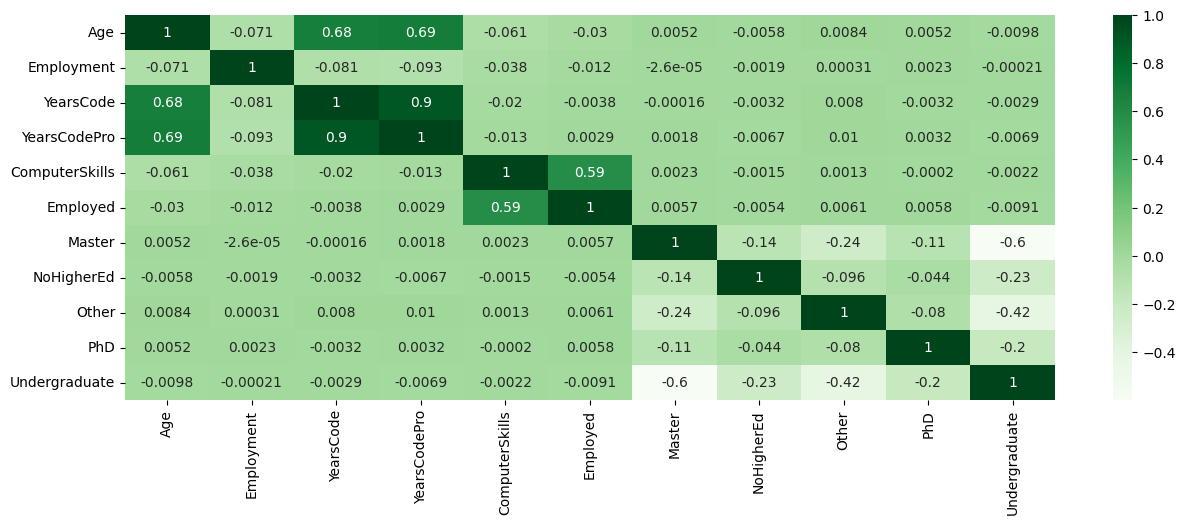

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(corr_matrix2, cmap="Greens", annot=True)

# What do these values mean?
The positive numbers indicate positive correlations (when one variable increases, the other variable tends to increase) and negative numbers indicating negative correlations (when one variable increases, the other variable tends to decrease).

From these observations, Master's and PhD education leveled canidates tend to be higher in age, more likely to be employed, have more years coding along with professional coding.

Suprisingly, other levels of education and those with no higher education tend to be more likely to have more ComputerSkills and are more likely to be Employed, compared to those who have PDH or Masters.
